
## Car Price Prediction
This notebook demonstrates a comprehensive approach to predicting car prices using machine learning techniques. 

### Objectives
1. Explore and preprocess the dataset.
2. Perform exploratory data analysis (EDA).
3. Build and evaluate machine learning models for predicting car prices.

#### Steps Covered:
- Data Loading and Inspection
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Model Training and Evaluation

---


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1. Loading DataSet

In [2]:
# read from csv file using pandas
df = pd.read_csv("../data/Cars.csv")

# print the first 4 rows of dataframe
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [3]:
# shape of our data (rows, columns)
df.shape

(8128, 13)

In [4]:
# inspect types of columns and oher infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# describes the statistics of the int/real numbers
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
### Here we have five values of owner, we convert them to 1 to 5 with
### First Owner as 1, Second as 2 ans so on manually since LabelEncoder is not that flexible to do so.

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df["owner"] = df["owner"].map(owner_mapping)

In [7]:
# original fuel columns and its contents
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
# Removing rows with fuel LPG or CNG.
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [9]:
# Striping kmpl from mileage and converting it into float
df['mileage'] = df['mileage'].astype(str).str.replace('kmpl', '').str.strip().astype(float)
df["mileage"].head(5)

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [10]:
# Removing CC from engine column and converting to float.
df['engine'] = df['engine'].astype(str).str.replace('CC', '').str.strip().astype(float)
df["engine"].head(5)

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [11]:
# replacing bhp from max power
df['max_power'] = df['max_power'].astype(str).str.replace('bhp', '').str.strip().astype(float)
df["max_power"].head(5)

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [12]:
# Only taking first name of the brand by splitting the name..

print(df['name'].unique())
df['name'] = df['name'].astype(str).str.split(' ').str[0]
print("----------------------------------------------------------")
print(df['name'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
----------------------------------------------------------
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [13]:
## dropping torque column
## ignoring errors as repeated action will cause column not found error
df = df.drop(columns=['torque'], errors='ignore')
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [14]:
# Test Drive Cars are ridiculously expensive. Since we do not want to
# involve this, we will simply delete all samples related to it.
print(df["owner"].unique())
df = df[~df['owner'].isin(['Test Drive Car'])]
df["owner"].unique()

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

In [ ]:
## converting year into age of car by sub the year from 2025.as_integer_ratio

df['year'] = 2025 - df['year']
df['year'].head()

0    11
1    11
2    19
3    15
4    18
Name: year, dtype: int64

Grouping Cars on the basis of their selling price as there are too many variants of the cars to one hot.

In [ ]:
grouped_cars = df.groupby('name')['selling_price'].mean()
grouped_cars.head()
grouped_cars_df = grouped_cars.sort_values(ascending=True).reset_index()
print(grouped_cars_df[:10])

         name  selling_price
0     Peugeot   57000.000000
1        Opel   68000.000000
2      Daewoo   77000.000000
3  Ambassador  124000.000000
4   Chevrolet  274515.438596
5        Fiat  296063.787234
6       Ashok  300000.000000
7      Datsun  314599.953846
8        Tata  357709.278308
9      Maruti  406732.703532


In [17]:
# Create a dictionary mapping car names to their index from grouped_cars_df
name_to_index = dict(zip(grouped_cars_df['name'], grouped_cars_df.index))

# Replace the 'name' column in the original df with the index values
df['name'] = df['name'].map(name_to_index)

# Check the updated df
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,9,11,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,16,11,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,15,19,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,10,15,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,9,18,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [18]:
name_to_index = dict(zip(grouped_cars_df['name'], grouped_cars_df.index))
name_to_index

{'Peugeot': 0,
 'Opel': 1,
 'Daewoo': 2,
 'Ambassador': 3,
 'Chevrolet': 4,
 'Fiat': 5,
 'Ashok': 6,
 'Datsun': 7,
 'Tata': 8,
 'Maruti': 9,
 'Hyundai': 10,
 'Renault': 11,
 'Nissan': 12,
 'Volkswagen': 13,
 'Ford': 14,
 'Honda': 15,
 'Skoda': 16,
 'Mahindra': 17,
 'Mitsubishi': 18,
 'Force': 19,
 'Toyota': 20,
 'Kia': 21,
 'MG': 22,
 'Isuzu': 23,
 'Jeep': 24,
 'Mercedes-Benz': 25,
 'Audi': 26,
 'Jaguar': 27,
 'Volvo': 28,
 'Land': 29,
 'BMW': 30,
 'Lexus': 31}

#### Label Encoding

The objects datatypes cannot be modeled so we have to convert them to some numerical equivalents. For that we are using LabelEncoder by sklearn.

In [19]:
# using label encoding for these 2 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["transmission", "seller_type", "fuel"]

for feat in features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])

df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,9,11,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,16,11,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0


#### 2. Exploratory Data Analysis (EDA)
EDA provides us with necessary information before using the data or using it for in-depth analysis through visualization, statistical analysis, variable analysis, etc.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   int64  
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   int64  
 5   seller_type    8033 non-null   int64  
 6   transmission   8033 non-null   int64  
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.9 KB


In [21]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

#### 2.1 Uni Variate Analysis 

#### Histogram

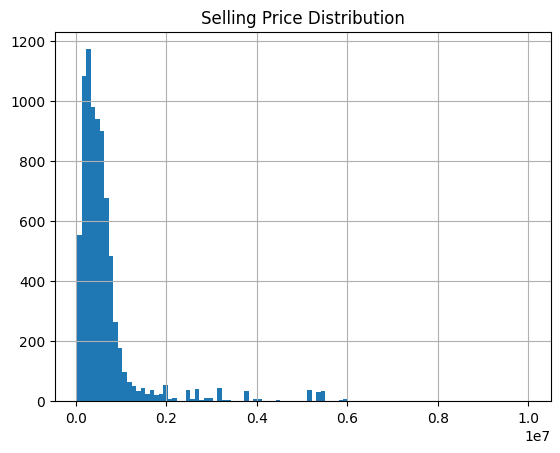

In [22]:
df['selling_price'].hist(bins=100)
plt.title('Selling Price Distribution')
plt.show()

#### Boxplot

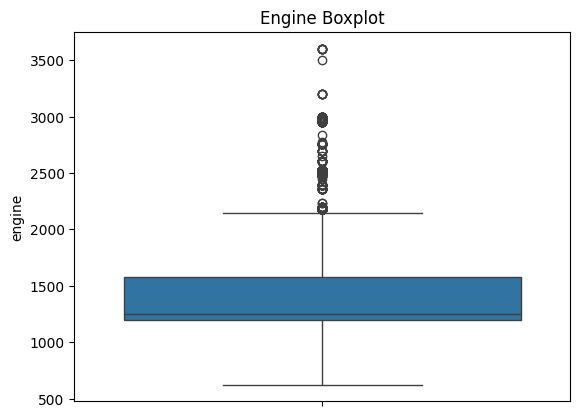

In [23]:
# using boxplot to identify any outliers
sns.boxplot((df['engine']))
plt.title('Engine Boxplot')
plt.show()


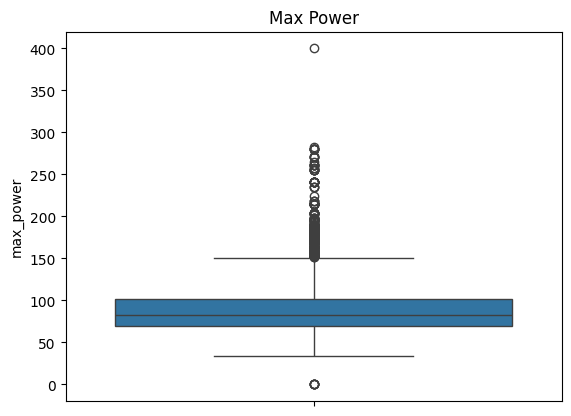

In [24]:
sns.boxplot((df['max_power']))
plt.title('Max Power')
plt.show()

#### Distribution plot

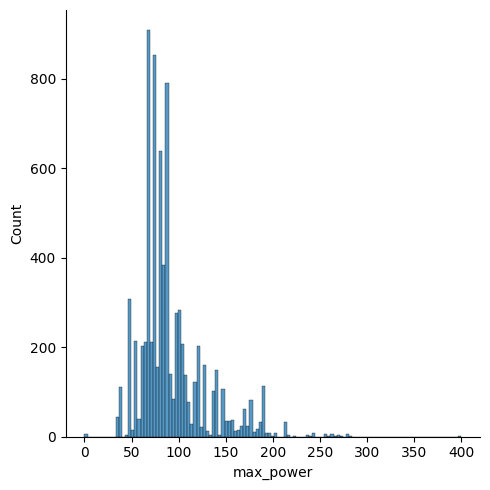

In [25]:
# gives us idea about the distribution of data
sns.displot(data = df, x = 'max_power')

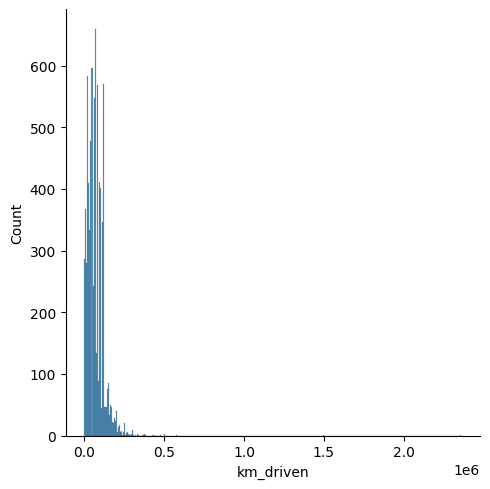

In [26]:
sns.displot(data = df, x = 'km_driven')

#### 2.2 Multi-variate Analysis

#### Boxplot

Text(0.5, 0, 'Selling Price')

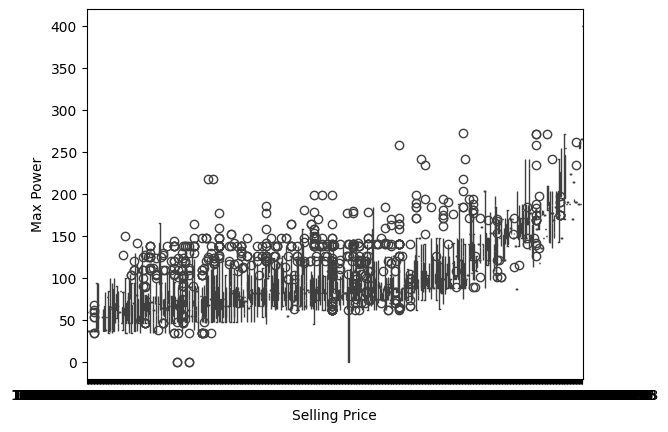

In [27]:
sns.boxplot(x = np.log(df["selling_price"]), y = df["max_power"]);
plt.ylabel("Max Power")
plt.xlabel("Selling Price")

#### Scatterplot

<Axes: xlabel='engine', ylabel='max_power'>

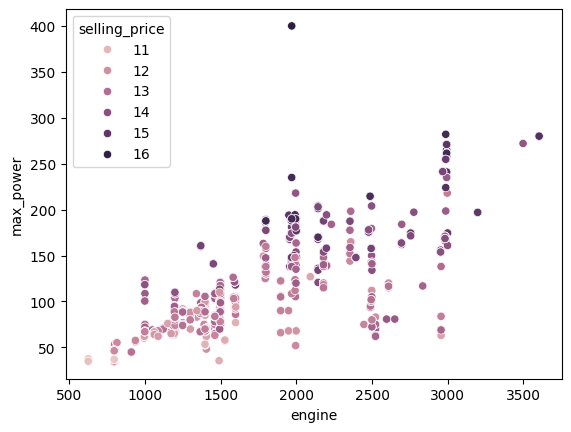

In [28]:
sns.scatterplot(x = df['engine'], y = df['max_power'], hue=(np.log(df['selling_price'])))

Converting selling price into new four classes 0, 1, 2 and 3 based on their price where 0 means lower price and 1 means higher and so on. So now we have a classsification problem in our hands.

In [29]:
labels = [0, 1, 2, 3]

# df['price_category'] = pd.cut(df['selling_price'], labels = labels, bins = 4)
df['price_category'] = pd.cut(df['selling_price'], bins=[0, 250000, 480000, 700000, np.inf], labels=[0, 1, 2, 3])
df.drop(columns=['selling_price'], inplace= True)
df['price_category'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

#### Correlation
It helps to find the relationship among the features, labels and helps us understanding the data more.It ranges from -1 to +1.

<Axes: >

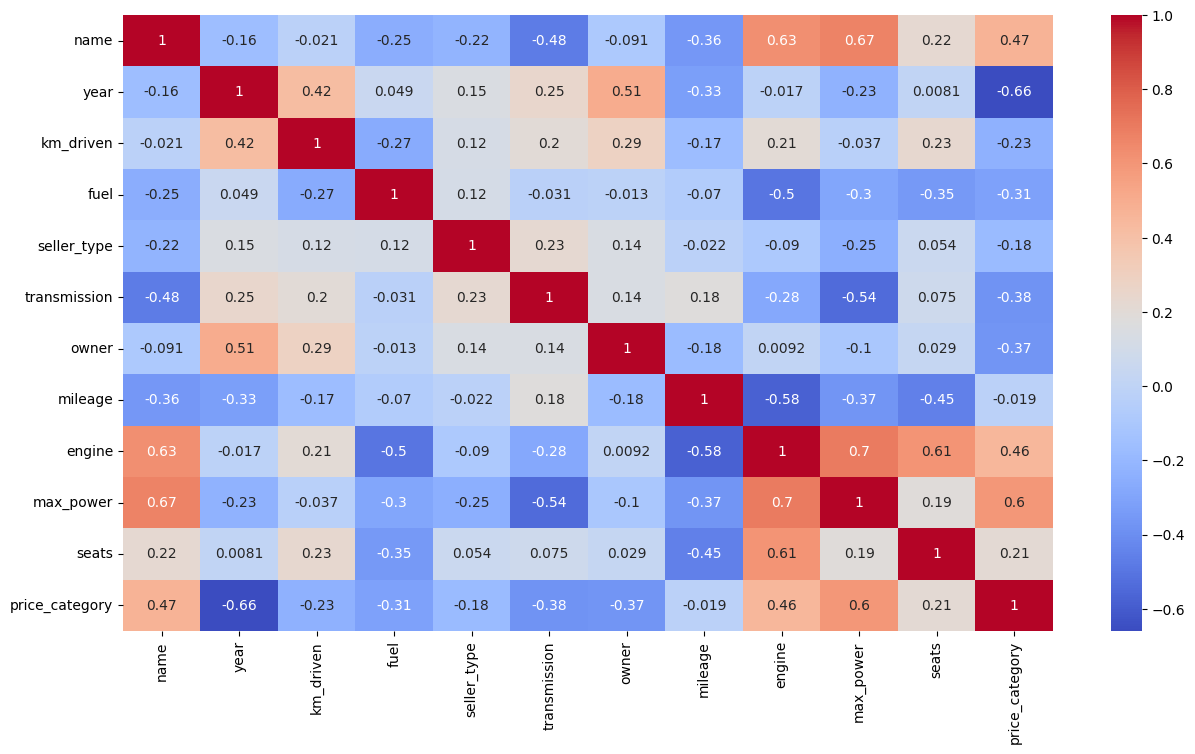

In [30]:
#correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='price_category', ylabel='Count'>

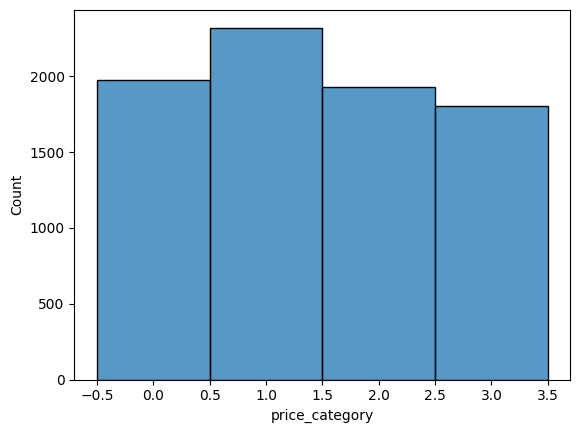

In [31]:
sns.histplot(df['price_category'])

#### 3. Feature Selection
In this section, we select the features (columns) from our dataset which will be used to train the model. The selection of features depends on but not exclusive to factors like the correlations, statistics and also some other logics.

Some logics behind the feature selection:
- Features like `year` (manufacture date) and `max_power` will have impacts on `selling_price` even though their correlation seems moderate, picking these seems logical.
- Feature `name` seems logical to include as we know that in real life, a car will sell higher or lower based on the brand and model name.

In [32]:
df.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'price_category'],
      dtype='object')

In [33]:
# x is our features
# ignoring some feature like seller_type, transmission, owner and seats,
# as they dont seem that much important.
X = df[ ['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power'] ]

# y is selling price class (to be predicted).

y = df['price_category']
X.shape, y.shape

((8033, 6), (8033,))

#### Train Test Split
The dataset is splitted into a ratio of training and testing set with the ratio varying according to the number of samples in the dataset. The most common train-test spiit are 90/10, 80/20 and 70/30.

In [34]:
# Spliting into 20% test adn 80% test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

#### 4. Preprocessing 

In [35]:
# checking for null, missing values in training set.
X_train.isna().sum()

name           0
year           0
km_driven      0
mileage      178
engine       178
max_power    175
dtype: int64

In [36]:
# checking for null, missing values in test set.
X_test.isnull().sum()

name          0
year          0
km_driven     0
mileage      36
engine       36
max_power    33
dtype: int64

#### Handling Null and Missing Values
Lets check for the skewness of the features mileage, engine and maxpower using histplot and use scipy to confirm it.   

<Axes: xlabel='engine', ylabel='Count'>

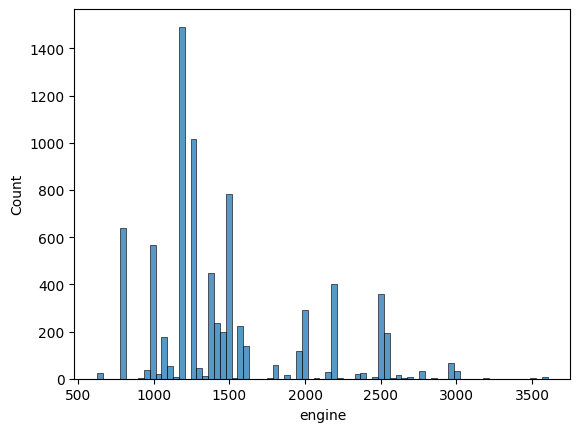

In [37]:
sns.histplot(data=df, x='engine')

The distribution of the feature `engine` looks right skewed. Lets confirm it by using scipy.stats

In [38]:
from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness of ENGINE: {skewness}")

Skewness of ENGINE: 1.1243926530777832


<Axes: xlabel='mileage', ylabel='Count'>

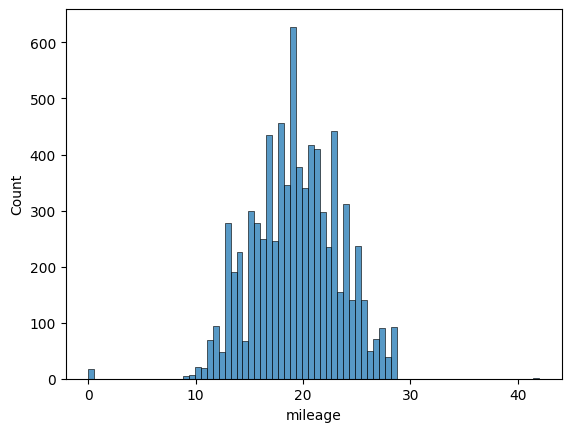

In [39]:
sns.histplot(data=df, x='mileage')

In [40]:
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness of MILEAGE: {skewness}")

# the distribution shows only a slight skewness or almost close to normal distribution.
# So replacing with mean or median really doesnt matter here.

Skewness of MILEAGE: -0.17239599936216496


<Axes: xlabel='max_power', ylabel='Count'>

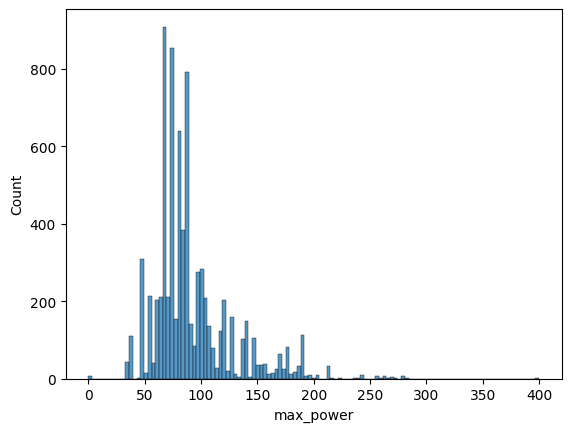

In [41]:
sns.histplot(data=df, x='max_power')

In [42]:
from scipy.stats import skew

skewness = skew(df['max_power'].dropna())
print(f"Skewness of MAX_POWER: {skewness}")

# the distribution shows a huge skewness.
# so missing na values must be replaced with median for max_power

Skewness of MAX_POWER: 1.6167922787880433


In [43]:
## mileage seems to have a close to a normal distribution. so replace NA values with Mean.
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


## these features seem to have a skewed distribution. So replace NA with Median.
skewed_features = ["engine", "max_power"]
for _feat in skewed_features:
    X_train[_feat].fillna(X_train[_feat].median(), inplace=True)

In [44]:
#Filling test set with the training distribution.

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

skewed_features_test = ["engine", "max_power"]
for _feat in skewed_features_test:
    X_test[_feat].fillna(X_train[_feat].median(), inplace=True)

In [45]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [46]:
# Make sure all values dont have missing or NA values
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

name         0
year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64
name         0
year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64
0
0


In [47]:
X_train.head(3)

,name,year,km_driven,mileage,engine,max_power
7020,14,15,48000,15.60,1196.0,70.0
762,13,15,80000,22.07,1199.0,73.9
4806,17,12,90000,12.05,2179.0,120.0


#### Outliers Detection

Lets detect the outliers in the features so that we can do something with them that will help to remove them or adjust them accordingly. 

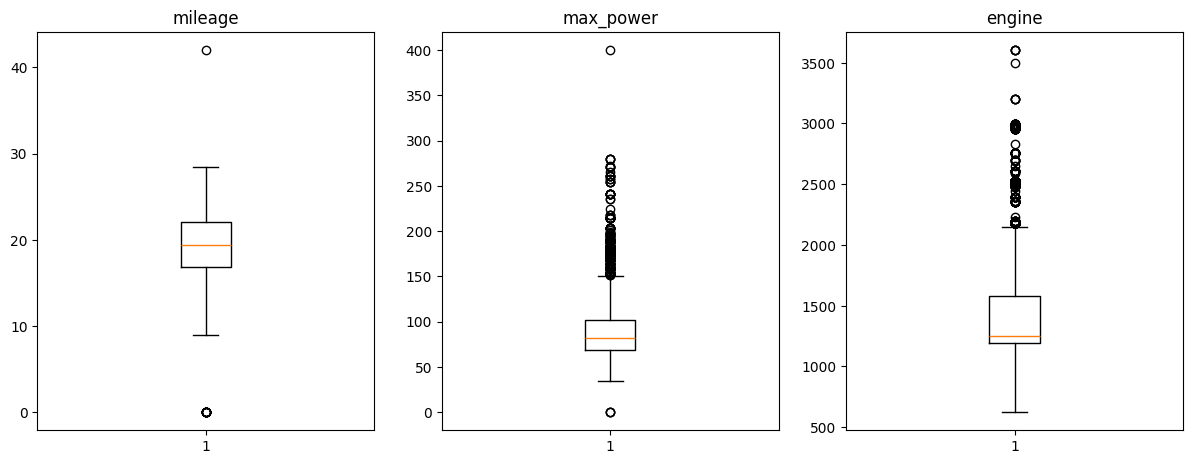

In [48]:
# Create a dictionary of columns.
col_dict = {'mileage':1,'max_power':2, 'engine': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [49]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [50]:
# removing the outliers from the X_train columns using the bounds
for col in ['year', 'km_driven', 'engine', 'max_power', 'mileage']:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue

    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------year---------------

Number of outliers: 58
Percent of data that is outlier: 0.9%

---------------km_driven---------------

Number of outliers: 131
Percent of data that is outlier: 2.04%

---------------engine---------------

Number of outliers: 944
Percent of data that is outlier: 14.69%

---------------max_power---------------

Number of outliers: 454
Percent of data that is outlier: 7.07%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.23%


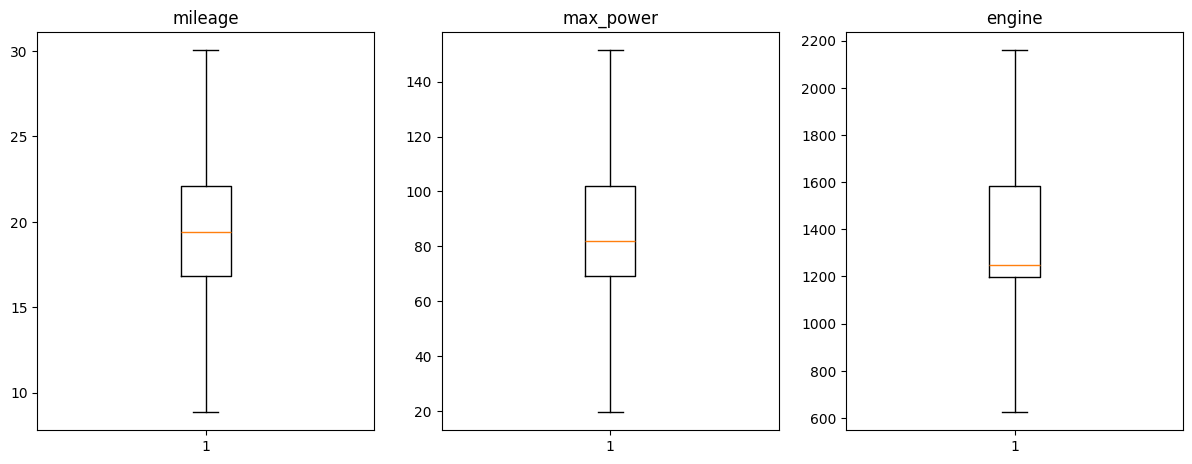

In [51]:
# Check for outliers again.
col_dict = {'mileage':1,'max_power':2, 'engine': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

#### Scaling
Standardizing the features using StandardScaler. This scales the data to have a mean of 0 and a standard deviation of 1, which is essential for algorithms that are sensitive to the magnitude of features.

In [52]:
# scaling helps in convergence faster. so 
# using standard scalar to scale our train test data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

In [53]:
# Save the scaler model for later use in website

import joblib
joblib.dump(ss, "../app/model/scaler.pkl")

['../app/model/scaler.pkl']

#### 5. Model Selection
Here, we will create our own Linear regression model from scratch.

First, lets setup mlflow experiment tracking.

In [54]:
# #experiment tracking
# import mlflow
# # import os
# # This the dockerized method.
# # We build two docker contain# os.environ["LOGNAME"] = "puskr"
# # The url `mlflow` is resolved into another container within the same composer.
# mlflow.set_tracking_uri("http://localhost:5013")

# mlflow.set_experiment(experiment_name="puskr-regularization")

In [61]:
import time 
from sklearn.model_selection import KFold

class CustomLogisticRegression:
    
    def __init__(self, k = None, n = None, penalty: float = None, method= "minibatch", alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.penalty = penalty

    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
    
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y, self.W)
                self.losses.append(loss)

                self.W = self.W - self.alpha * grad
                
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y, self.W)
                self.losses.append(loss)
                
                self.W = self.W - self.alpha * grad

                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train, self.W)
                self.losses.append(loss)

                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y, W):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.get_ridge_penalty(W) is not None:
            grad = self.softmax_grad(X, error) + self.get_ridge_derivation(W)
        else:
            grad = self.softmax_grad(X, error)
            
        return loss, grad


    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)


    def softmax_grad(self, X, error):
        return  X.T @ error


    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        # print(X.shape, W.shape)
        return self.softmax(X @ W)


    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)


    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions


    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if TP + FP > 0 else 0


    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if TP + FN > 0 else 0


    def f1_score(self, precision, recall):
        return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0


    def macro_precision(self, y_true, y_pred):
        precisions = [self.precision(y_true, y_pred, c) for c in range(self.k)]
        return np.mean(precisions)


    def macro_recall(self, y_true, y_pred):
        recalls = [self.recall(y_true, y_pred, c) for c in range(self.k)]
        return np.mean(recalls)


    def macro_f1(self, y_true, y_pred):
        f1_scores = [self.f1_score(self.precision(y_true, y_pred, c), self.recall(y_true, y_pred, c))
                     for c in range(self.k)]
        return np.mean(f1_scores)


    def weighted_precision(self, y_true, y_pred):
        precisions = [self.precision(y_true, y_pred, c) for c in range(self.k)]
        class_counts = [np.sum(y_true == c) for c in range(self.k)]
        total_samples = len(y_true)
        return np.sum(np.array(precisions) * np.array(class_counts)) / total_samples


    def weighted_recall(self, y_true, y_pred):
        recalls = [self.recall(y_true, y_pred, c) for c in range(self.k)]
        class_counts = [np.sum(y_true == c) for c in range(self.k)]
        total_samples = len(y_true)
        return np.sum(np.array(recalls) * np.array(class_counts)) / total_samples


    def weighted_f1(self, y_true, y_pred):
        f1_scores = [self.f1_score(self.precision(y_true, y_pred, c), self.recall(y_true, y_pred, c))
                     for c in range(self.k)]
        class_counts = [np.sum(y_true == c) for c in range(self.k)]
        total_samples = len(y_true)
        return np.sum(np.array(f1_scores) * np.array(class_counts)) / total_samples
    

    def custom_classification_report(self, y_true, y_pred):
            print(f"{'Class':<10}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}")
            print("-" * 50)

            for c in range(self.k):
                precision = self.precision(y_true, y_pred, c)
                recall = self.recall(y_true, y_pred, c)
                f1 = self.f1_score(precision, recall)
                print(f"{c:<10}{precision:<12.4f}{recall:<12.4f}{f1:<12.4f}")

            accuracy = self.accuracy(y_true, y_pred)
            macro_precision = self.macro_precision(y_true, y_pred)
            macro_recall = self.macro_recall(y_true, y_pred)
            macro_f1 = self.macro_f1(y_true, y_pred)
            weighted_precision = self.weighted_precision(y_true, y_pred)
            weighted_recall = self.weighted_recall(y_true, y_pred)
            weighted_f1 = self.weighted_f1(y_true, y_pred)

            print("\nOverall Metrics:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Macro Precision: {macro_precision:.4f}")
            print(f"Macro Recall: {macro_recall:.4f}")
            print(f"Macro F1: {macro_f1:.4f}")
            print(f"Weighted Precision: {weighted_precision:.4f}")
            print(f"Weighted Recall: {weighted_recall:.4f}")
            print(f"Weighted F1: {weighted_f1:.4f}")


    #Lets implement L2 or Ridge penalty for our logistic regression.
    def get_ridge_penalty(self, W):
        # if no penalty return none
        if self.penalty is None:
            return None
        return self.penalty * np.sum(np.square(W))


    # derivation of Ridge.
    def get_ridge_derivation(self, W):
        return self.penalty * 2 * W

In [62]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [63]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

Loss at iteration 0 1.5187998467124055
Loss at iteration 500 0.8733948117170061
Loss at iteration 1000 0.879345203269435
Loss at iteration 1500 0.8710604291778926
Loss at iteration 2000 0.8725968488398873
Loss at iteration 2500 0.8766846228636549
Loss at iteration 3000 0.8726970553528501
Loss at iteration 3500 0.8352391492238836
Loss at iteration 4000 0.8266489733726189
Loss at iteration 4500 0.8724033612140926
time taken: 0.5065040588378906
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.65      0.92      0.76       389
           1       0.64      0.27      0.38       428
           2       0.59      0.43      0.50       408
           3       0.57      0.85      0.68       382

    accuracy                           0.61      1607
   macro avg       0.61      0.62      0.58      1607
weighted avg       0.61      0.61      0.57      1607

=========Custom Classification Report===============
Class     Precision

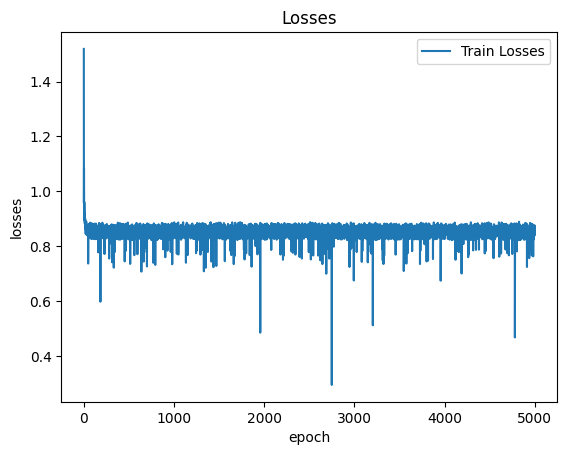

In [64]:
from sklearn.metrics import classification_report, accuracy_score

model = CustomLogisticRegression(penalty=None, k = len(labels), n= X_train.shape[1], method="minibatch")

model.fit(X_train, Y_train_encoded)

yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_true=y_test, y_pred=yhat))

print("=========Custom Classification Report===============")
print(model.custom_classification_report(y_true= y_test, y_pred=yhat))

In [59]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [61]:
# from itertools import product

# regs_list = ["LinearRegression", "Lasso", "Ridge"]
# lr_list = [0.01, 0.001, 0.0001]
# weights_list = ['zeros', 'xavier']
# methods_list = ["batch", "mini_batch", "stochastic"]
# momentum_list = [None, 0.2, 0.3, 0.7, 0.8, 0.9]

# ## degrees > 2 were causing inf values. So didnt add above 2.
# degrees_list = [None, 2]

# ## combinsations of params
# param_combinations = product(
#         regs_list,
#         lr_list,
#         weights_list,
#         methods_list,
#         momentum_list,
#         degrees_list
#     )

# ## initialize the model and score params
# best_r2_model, best_r2, best_r2_params = None, float('-inf'), None
# best_mse_model, best_mse, best_params_mse = None, float('inf'), None

# ## grid search in param_conbinations.
# for reg, lr, weight, method, momemtum, degree in param_combinations:
#     params = {"method": method, "lr": lr, "weight_init": weight, "degree": degree, "momemtum": momemtum}
#     with mlflow.start_run(
#         run_name=f"method-{method}-lr-{lr}-reg-{reg}-weight-{weight}-momemtum-{momemtum}-degree-{degree}",
#         nested=True):
#         print("="*5, reg, "="*5)

#         # #######
#         type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
#         model: LinearRegression = type_of_regression(**params)
#         model.fit(X_train, y_train)
#         yhat = model.predict(X_test)
#         mse  = model.mse(ytrue= y_test, ypred= yhat)
#         r2_score = model._compute_r2_score(y_actual= y_test, y_pred= yhat)
        
#         mlflow.log_metric(key="test_mse", value=mse)

#         signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#         mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

#         # model with best mse score.
#         if mse < best_mse:
#             best_mse = mse
#             best_mse_model = model
#             best_params_mse = params 

#         # model with best r2 score.
#         if r2_score > best_r2:
#             best_r2 = r2_score
#             best_r2_model = model
#             best_r2_params = params
        
#         mlflow.end_run()

# ### CLEARED OUTPUT AS IT WAS BEING MESSY IN GITHUB DUE TO TOO MANY ITERATIONS.
# ### CLEARED OUTPUT AS IT WAS BEING MESSY IN GITHUB DUE TO TOO MANY ITERATIONS.

Here I decided to clear the output of this cell/mlflow logs after observing the datas as it was being messy in github due to many iterations.

In [62]:
# print(f"Best Model by R² Score: {best_r2_model} with R² Score: {best_r2:.4f}")
# print(f"Best Model by MSE: {best_mse_model} with MSE: {best_mse:.4f}")

# print('Best params: ', best_params_mse)

Here we find out that after GridSearch, it says that the best model is Lasso with params method = mini_batch, lr=0.01, weight_init=xavier, degree=None and momemtum=0.9. 

So we will be using that model for latter use.

In [63]:
# ## Lasso using the best parameters as reported from the experiment.
# _grid_model = Lasso(method="mini_batch", lr=0.01, weight_init= "xavier", degree=None, momemtum= 0.9)
# _grid_model.fit(X_train, y_train)

In [64]:
# _grid_model.plot_feature_importance()

#### 7. Inference
To provide inference service or deploy, it's best to save the model for latter use.

In [68]:
import cloudpickle

with open("../app/model/car_price_predictor", "wb") as f:
    cloudpickle.dump(model, f)

Using the saved model to predict.

In [69]:
# load the model from disk
with open("../app/model/car_price_predictor", "rb") as f:
    loaded_model = cloudpickle.load(f)

#### Implementation

`Scenario 1: Relatively New Audi Car`
- Engine : 2967 CC
- Max Power: 241 bhp
- Manufactured Year: 2015
- Km_driven: 53000 km
- Name: Audi
- Mileage: 17 kmpl
- Uses: Petrol

Here we can see that this car has great engine and max_power and is of brand `Audi` with a good mileage and bought recently. As all the criterias seems very good, it seems logical that we assume this will have a high selling price.

In [70]:
feat_cols = ['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power']
input_data = [25, 7, 53000, 12, 2967, 241]

test1 = pd.DataFrame([input_data], columns= feat_cols)
# Audi Q7 35 TDI Quattro Premium,2015,2650000,53000,Diesel,Dealer,Automatic,First Owner,12.07 kmpl,2967 CC,241.4 bhp,550Nm@ 1750-2750rpm,7

`Scenario 2: Old Maruti Car`
- Engine : 1298 CC
- Max Power: 88 bhp
- Manufactured Year: 2007
- Km_driven: 120000 km
- Name: Maruti
- Mileage: 16 kmpl

Here we can see that this car has good engine and max_power is just 88 bhp which is just okish,  and is of brand `Maruti` with a good mileage and bought in 2010. The characteristics seems very iffy and the selling price can be assumed to be low. Lets see how the model predicts this one.

In [74]:
feat_cols = ['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power']
input_data = [9, 18, 53000, 12, 1298, 88]

test2 = pd.DataFrame([input_data], columns= feat_cols)

# Maruti Swift VXI BSIII,2007,150000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"

Since our model is trained on the scaled data we need to scale the test dataset as well to get more accurate predictions.

Also, We have to use np.exp() to look at the predicted selling price as they are transformed values using logarithmic function.

In [75]:
scaler_fit_model = joblib.load("../app/model/scaler.pkl")

# since our model is trained by scaling the features, need to do it here as well.
final_data_1 = scaler_fit_model.transform(test1)
final_data_2 = scaler_fit_model.transform(test2)

sample_1 = loaded_model.predict(final_data_1)
sample_2 = loaded_model.predict(final_data_2)

print("Predicted price of Sample 1 car:", sample_1[0])
print("Predicted price of Sample 2 car:", sample_2[0])

Predicted price of Sample 1 car: 3
Predicted price of Sample 2 car: 0


As assumed by us beforehand, the predicted price class of sample 1:new audi car is 3(expensive) which seems reasonable. Also, the predicted price of sample 2:old maruti car is 0 (cheap) which also seems understandable.

### Findings

Here are some of the findings from the implementation of custom Linear Regression:

1. When we are using momentum for faster convergence, we also need to account for the gradient explosion. So normalizing or clipping the gradient makes sense when using momemtum.

2. When the higher degree of polynomial (>2) were used, the values of mse's were approaching infifinty.

3. Initializing weights using xavier method seems to be more effective and more stable for our dataset as it reduced vanishing and exploding gradient problem.

4. When regularization was used, it made the model more stable and overfitting was greatly reduced.

5. When a higher value of momemtum was used, there was a significant drop in mean squared error(mse) after some folds.This might have be due to faster convergence.

Here are some captured screenshots of mlflow:

![title](../screenshots/ml1.png)

![title](../screenshots/mlflow.png)


![title](../screenshots/ml2.png)


Here are the best mse and r2 scores from each regression type
| Regression         | Method       | Learning Rate | Weight Initialization | Polynomial Degree | Momentum | Best MSE | Best R²  |
|--------------------|--------------|---------------|------------------------|-------------------|----------|----------|----------|
| Lasso             | Mini-batch   | 0.01          | Xavier                | None              | 0.9      | 0.1149   | 0.7803   |
| Ridge             | Mini-batch   | 0.01          | Xavier                | None              | 0.8      | 0.1764   | 0.7207   |
| Linear Regression | Stochastic   | 0.01           | Zeros                 | None              | None      | 0.2731   | 0.6643   |
